In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
import prepare
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
titanic = prepare.prep_titanic(titanic)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [4]:
train, validate, test = prepare.my_train_test_split(titanic, 'survived')

In [5]:
train.shape, validate.shape, test.shape

((534, 12), (178, 12), (179, 12))

In [6]:
[dataset.drop(columns=['sex', 'embark_town', 'passenger_id'], inplace=True) for dataset in [train, validate, test]]

[None, None, None]

In [7]:
train.shape, validate.shape, test.shape

((534, 9), (178, 9), (179, 9))

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [9]:
X_train = train.drop(columns='survived')
y_train = train.survived

In [10]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [11]:
# Those who didn't survive is my baseline prediction.
(y_train == 0).mean()
print(f'Our baseline accuracy for nonsurvival in all cases on the Titanic is {(y_train == 0).mean():.2}')


Our baseline accuracy for nonsurvival in all cases on the Titanic is 0.62


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [13]:
clf.fit(X_train, y_train)
print(f'training score: {clf.score(X_train, y_train):.2%}')


training score: 94.57%


In [14]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 0])

In [15]:
y_preds = pd.DataFrame({'y_act': y_train, 'baseline': 0, 'model_1': clf.predict(X_train)})
y_preds

,y_act,baseline,model_1
455,1,0,0
380,1,0,1
492,0,0,0
55,1,0,1
243,0,0,0
...,...,...,...
695,0,0,0
128,1,0,1
636,0,0,0
222,0,0,0


In [16]:
confusion_matrix(y_train, y_pred)

array([[327,   2],
       [ 27, 178]])

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [17]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.95


In [18]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,327,2
1,27,178


In [19]:
pd.DataFrame(classification_report(y_preds.y_act, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.923729,0.988889,0.945693,0.956309,0.948743
recall,0.993921,0.868293,0.945693,0.931107,0.945693
f1-score,0.957540,0.924675,0.945693,0.941108,0.944924
support,329.000000,205.000000,0.945693,534.000000,534.000000


In [20]:
conf = confusion_matrix(y_preds.y_act, y_preds.model_1)
conf

array([[327,   2],
       [ 27, 178]])

In [21]:
rubric_df = pd.DataFrame({
    'pred_death': ['True Negative', 'False Negative'],
    'pred_survive':['False Positive','True Positive']
    }, index=['actual_death', 'actual_survive'])
rubric_df

,pred_death,pred_survive
actual_death,True Negative,False Positive
actual_survive,False Negative,True Positive


In [22]:
rubric_df + ': ' + conf.astype(str)

,pred_death,pred_survive
actual_death,True Negative: 327,False Positive: 2
actual_survive,False Negative: 27,True Positive: 178


In [23]:
TN = conf[0,0] 
FP = conf[0,1]
FN = conf[1,0]
TP = conf[1,1]

In [24]:
TN, FP, FN, TP

(327, 2, 27, 178)

In [25]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

5. Run through steps 2-4 using a different max_depth value.

In [26]:
clf2 = DecisionTreeClassifier(max_depth=3)
clf2

DecisionTreeClassifier(max_depth=3)

In [27]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
print(f'training score: {clf2.score(X_train, y_train):.2%}')


training score: 81.84%


In [29]:
y_preds['model2'] = clf2.predict(X_train)
y_preds[0:5]

,y_act,baseline,model_1,model2
455,1,0,0,0
380,1,0,1,1
492,0,0,0,0
55,1,0,1,0
243,0,0,0,0


In [30]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [31]:
X_val, y_val = validate.drop(columns='survived'), validate.survived

In [32]:
clf.score(X_train, y_train)

0.9456928838951311

In [33]:
X_train.shape, X_val.shape

((534, 8), (178, 8))

In [34]:
clf.score(X_val, y_val)

0.7415730337078652

In [35]:
clf2.score(X_train, y_train)

0.8183520599250936

In [36]:
clf2.score(X_val, y_val)

0.7921348314606742

In [37]:
models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [40]:
model_scores

[0.7921348314606742,
 0.8183520599250936,
 0.8202247191011236,
 0.8333333333333334,
 0.8595505617977528,
 0.8651685393258427]

6. Which model performs better on your in-sample data?

The second model has a better training score/ validate score ratio but the first model has better precision on detecting those who won't survive by a slight margin.  They both have the same accuracy though. 

7. Which model performs best on your out-of-sample data, the validate set?

The second model 

In [10]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [11]:
new_telco = prepare.prep_telco(telco)
new_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [15]:
new_telco.gender_encoded

0       1
1       0
2       0
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    0
Name: gender_encoded, Length: 7043, dtype: int64

In [4]:
train, validate, test = prepare.my_train_test_split(telco, 'churn')

In [5]:
train.shape, validate.shape, test.shape

((4225, 42), (1409, 42), (1409, 42))

In [6]:
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [7]:
train['baseline_prediction'] = 'No'

In [8]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,fiber_optic,internet_service_type_None,auto_payment,electronic_payment,mailed_check,baseline_prediction
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,0,0,1,0,0,0,0,0,0,No
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,1,0,1,0,0,1,0,1,0,No
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,0,0,0,0,0,0,0,1,No
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,0,1,0,1,0,0,0,0,0,No
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,0,1,1,0,1,0,1,0,0,No


In [9]:
baseline_acc = (train.baseline_prediction == train.churn).mean()

print(f'baseline accuracy: {baseline_acc:.2%}')

baseline accuracy: 73.47%


In [10]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [11]:
X_cols = ['fiber_optic', 'online_backup', 'multiple_lines', 'tenure', 'senior_citizen']
y_col = 'churn'

In [12]:
X_train, y_train = train[X_cols], train[y_col]

In [15]:
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

# Random Forest

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
titanic = prepare.prep_titanic(titanic)
titanic

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [5]:
titanic = titanic.drop(columns=['sex', 'embark_town', 'passenger_id'])

In [6]:
titanic.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [7]:
train, validate, test = prepare.my_train_test_split(titanic, 'survived')

In [8]:
train.shape, validate.shape, test.shape

((534, 9), (178, 9), (179, 9))

In [9]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [46]:
baseline = y_train.mode()

base_acc = (y_train == 0).mean()
base_acc

0.6161048689138576

In [10]:
rf = RandomForestClassifier(min_samples_leaf=3, max_depth=10, random_state=123)

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=123)

In [12]:
print(rf.feature_importances_)

[0.12858761 0.06506827 0.037026   0.29119397 0.02451013 0.40470764
 0.01278547 0.0361209 ]


In [13]:
y_preds = rf.predict(X_train)

In [14]:
y_pred_proba = rf.predict_proba(X_train)

In [15]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.88


In [17]:
pd.DataFrame(confusion_matrix(y_train, y_preds))

,0,1
0,316,13
1,52,153


In [19]:
print(classification_report(y_train, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       329
           1       0.92      0.75      0.82       205

    accuracy                           0.88       534
   macro avg       0.89      0.85      0.87       534
weighted avg       0.88      0.88      0.88       534



- Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [25]:
rf2 = RandomForestClassifier(min_samples_leaf=4, max_depth=9, random_state=123)
rf3 = RandomForestClassifier(min_samples_leaf=5, max_depth=8, random_state=123)
rf4 = RandomForestClassifier(min_samples_leaf=6, max_depth=7, random_state=123)
rf5 = RandomForestClassifier(min_samples_leaf=7, max_depth=6, random_state=123)

In [26]:
rf2.fit(X_train, y_train)
rf3.fit(X_train, y_train)
rf4.fit(X_train, y_train)
rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=7, random_state=123)

In [27]:
y_preds2 = rf2.predict(X_train)
y_preds3 = rf3.predict(X_train)
y_preds4 = rf4.predict(X_train)
y_preds5 = rf5.predict(X_train)

In [28]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf3.score(X_train, y_train)))
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf4.score(X_train, y_train)))
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf5.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86
Accuracy of random forest classifier on training set: 0.85
Accuracy of random forest classifier on training set: 0.83
Accuracy of random forest classifier on training set: 0.84


In [29]:
print('model2')
print(classification_report(y_train, y_preds2))
print()
print('model3')
print(classification_report(y_train, y_preds3))
print()
print('model4')
print(classification_report(y_train, y_preds4))
print()
print('model5')
print(classification_report(y_train, y_preds5))

model2
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       329
           1       0.91      0.70      0.79       205

    accuracy                           0.86       534
   macro avg       0.87      0.83      0.84       534
weighted avg       0.87      0.86      0.86       534


model3
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       329
           1       0.90      0.68      0.78       205

    accuracy                           0.85       534
   macro avg       0.86      0.82      0.83       534
weighted avg       0.85      0.85      0.84       534


model4
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       329
           1       0.88      0.65      0.75       205

    accuracy                           0.83       534
   macro avg       0.85      0.80      0.81       534
weighted avg       0.84      0.83      0.83       5

In [33]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))
print(rf2.score(X_validate, y_validate))
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf3.score(X_train, y_train)))
print(rf3.score(X_validate, y_validate))
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf4.score(X_train, y_train)))
print(rf4.score(X_validate, y_validate))
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf5.score(X_train, y_train)))
print(rf5.score(X_validate, y_validate))

Accuracy of random forest classifier on training set: 0.86
0.8146067415730337
Accuracy of random forest classifier on training set: 0.85
0.8033707865168539
Accuracy of random forest classifier on training set: 0.83
0.7921348314606742
Accuracy of random forest classifier on training set: 0.84
0.8089887640449438


In [40]:
round(rf2.score(X_train, y_train) - rf2.score(X_validate, y_validate), 4)

0.0449

In [41]:
round(rf3.score(X_train, y_train) - rf3.score(X_validate, y_validate), 4)

0.0449

In [44]:
round(rf4.score(X_train, y_train) - rf4.score(X_validate, y_validate), 4)

0.0412

In [43]:
round(rf5.score(X_train, y_train) - rf5.score(X_validate, y_validate), 4)

0.0262

In [47]:
# Model 5 has the closest metrics on both train and validate.

In [48]:
# For Loop method

for i in range (2, 11):
    forest = RandomForestClassifier(max_depth = i, random_state=123)
    forest = forest.fit(X_train, y_train)
    y_predictions = forest.predict(X_train)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(classification_report(y_train, y_predictions, output_dict=True)))

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.763855    0.899160  0.794007    0.831508      0.815798
recall       0.963526    0.521951  0.794007    0.742739      0.794007
f1-score     0.852151    0.660494  0.794007    0.756322      0.778574
support    329.000000  205.000000  0.794007  534.000000    534.000000
Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.813333    0.849057   0.82397    0.831195      0.827047
recall       0.927052    0.658537   0.82397    0.792794      0.823970
f1-score     0.866477    0.741758   0.82397    0.804118      0.818598
support    329.000000  205.000000   0.82397  534.000000    534.000000
Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.827586    0.891720  0.846442    0.859653      0.852207
recall       0.948328    0.682927  0.846442    0.815628      0.846442
f1-score     0.

In [49]:
metrics = []

for i in range(2, 25):
    forest = RandomForestClassifier(max_depth=i, random_state=123)
    forest = forest.fit(X_train, y_train)
    in_sample_accuracy = forest.score(X_train, y_train)
    out_sample_accuracy = forest.score(X_validate, y_validate)
    
    output = {
        'max_depth': i,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_sample_accuracy,     
    }
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df
    

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.794007,0.786517,0.007491
1,3,0.823970,0.803371,0.020599
2,4,0.846442,0.803371,0.043071
3,5,0.857678,0.803371,0.054307
4,6,0.880150,0.786517,0.093633
5,7,0.902622,0.792135,0.110487
6,8,0.930712,0.769663,0.161049
7,9,0.940075,0.775281,0.164794
8,10,0.943820,0.758427,0.185393
9,11,0.943820,0.764045,0.179775


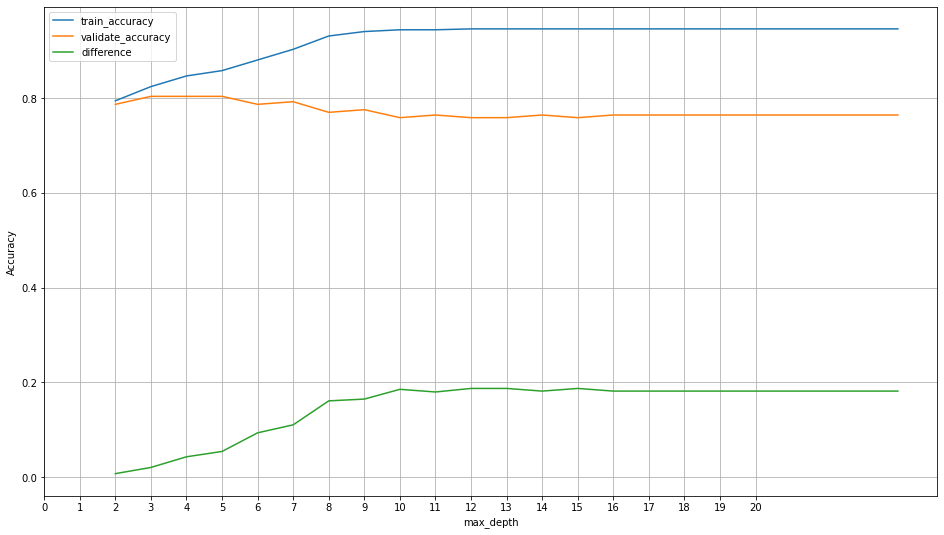

In [55]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

# KNN

In [2]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
titanic = prepare.prep_titanic(titanic)
titanic.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [4]:
train, validate, test = prepare.my_train_test_split(titanic, 'survived')

In [5]:
train.shape, validate.shape, test.shape

((534, 9), (178, 9), (179, 9))

In [6]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_train)
y_pred[:5]

array([0, 1, 1, 0, 0])

In [10]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.81


In [11]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.848485,0.759804,0.814607,0.804144,0.814441
recall,0.851064,0.756098,0.814607,0.803581,0.814607
f1-score,0.849772,0.757946,0.814607,0.803859,0.814521
support,329.000000,205.000000,0.814607,534.000000,534.000000


In [12]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn3 = KNeighborsClassifier(n_neighbors=20)

knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [13]:
y_pred2 = knn2.predict(X_train)
y_pred3 = knn3.predict(X_train)

In [15]:
print('KNN2')
print(classification_report(y_train, y_pred2))
print()
print('KNN3')
print(classification_report(y_train, y_pred3))

KNN2
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       329
           1       0.75      0.64      0.69       205

    accuracy                           0.78       534
   macro avg       0.78      0.76      0.76       534
weighted avg       0.78      0.78      0.78       534


KNN3
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       329
           1       0.72      0.54      0.62       205

    accuracy                           0.74       534
   macro avg       0.74      0.70      0.71       534
weighted avg       0.74      0.74      0.73       534



In [16]:
# as the K increased the accuracy decreased.

In [17]:
y_preds = knn.predict(X_validate)
y_preds2 = knn2.predict(X_validate)
y_preds3 = knn3.predict(X_validate)

In [18]:
print('KNN1_Validate')
print(classification_report(y_validate, y_preds))
print()
print('KNN2_Validate')
print(classification_report(y_validate, y_preds2))
print()
print('KNN3_Validate')
print(classification_report(y_validate, y_preds3))

KNN1_Validate
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       110
           1       0.64      0.68      0.66        68

    accuracy                           0.73       178
   macro avg       0.72      0.72      0.72       178
weighted avg       0.73      0.73      0.73       178


KNN2_Validate
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       110
           1       0.63      0.57      0.60        68

    accuracy                           0.71       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.70      0.71      0.71       178


KNN3_Validate
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       110
           1       0.57      0.46      0.51        68

    accuracy                           0.66       178
   macro avg       0.64      0.62      0.63       178
weighted avg       0.65      0

In [20]:
metrics = []

for i in range(10, 21,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    forest = knn.fit(X_train, y_train)
    in_sample_accuracy = forest.score(X_train, y_train)
    out_sample_accuracy = forest.score(X_validate, y_validate)
    
    output = {
        'K': i,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_sample_accuracy,     
    }
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,K,train_accuracy,validate_accuracy,difference
0,10,0.782772,0.707865,0.074906
1,20,0.743446,0.662921,0.080524


# Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

In [55]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [56]:
titanic = prepare.prep_titanic(titanic)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [57]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [58]:
titanic['age'] = titanic.age.fillna(value = 24)

In [59]:
titanic.age.isna().sum()

0

In [60]:
titanic = titanic.drop(columns = ['sibsp', 'parch', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'])

In [61]:
train, validate, test = prepare.my_train_test_split(titanic, 'survived')

In [62]:
train.shape, validate.shape, test.shape

((534, 5), (178, 5), (179, 5))

In [63]:
X_train = train.drop(columns = 'survived')
y_train = train.survived
X_validate = validate.drop(columns = 'survived')
y_validate = validate.survived
X_test = test.drop(columns = 'survived')
y_test = test.survived

In [64]:
logit = LogisticRegression()

In [65]:
logit.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = logit.predict(X_train)

In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79       329
           1       0.68      0.47      0.56       205

    accuracy                           0.71       534
   macro avg       0.70      0.67      0.67       534
weighted avg       0.71      0.71      0.70       534



In [68]:
titanic2 = acquire.get_titanic_data()
titanic2.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [69]:
titanic2 = prepare.prep_titanic(titanic2)

In [70]:
titanic2['age'] = titanic2.age.fillna(value = 24)

In [71]:
titanic2 = titanic2.drop(columns = ['sibsp', 'parch', 'embark_town_Queenstown', 'embark_town_Southampton'])

In [72]:
titanic2.head()

,survived,pclass,age,fare,alone,sex_male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,0,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,0,0
4,0,3,35.0,8.0500,1,1


In [73]:
train2, validate2, test2 = prepare.my_train_test_split(titanic2, 'survived')

In [74]:
train2.shape, validate2.shape, test2.shape

((534, 6), (178, 6), (179, 6))

In [75]:
X_train2 = train2.drop(columns = 'survived')
y_train2 = train2.survived
X_validate2 = validate2.drop(columns = 'survived')
y_validate2 = validate2.survived
X_test2 = test2.drop(columns = 'survived')
y_test2 = test2.survived

In [76]:
logit2 = LogisticRegression()

In [77]:
logit2.fit(X_train2, y_train2)

LogisticRegression()

In [78]:
y_pred2 = logit2.predict(X_train2)

In [79]:
print(classification_report(y_train2, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       329
           1       0.74      0.72      0.73       205

    accuracy                           0.80       534
   macro avg       0.78      0.78      0.78       534
weighted avg       0.80      0.80      0.80       534



In [80]:
titanic3 = acquire.get_titanic_data()

In [81]:
titanic3 = prepare.prep_titanic(titanic3)

In [82]:
titanic3['age'] = titanic3.age.fillna(value = 24)

In [83]:
titanic3 = titanic3.drop(columns = ['sibsp', 'parch'])
titanic3.head(2)

,survived,pclass,age,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,7.2500,0,1,0,1
1,1,1,38.0,71.2833,0,0,0,0


In [84]:
train3, validate3, test3 = prepare.my_train_test_split(titanic3, 'survived')

In [85]:
train3.shape, validate3.shape, test3.shape

((534, 8), (178, 8), (179, 8))

In [86]:
X_train3 = train3.drop(columns = 'survived')
y_train3 = train3.survived
X_validate3 = validate3.drop(columns = 'survived')
y_validate3 = validate3.survived
X_test3 = test3.drop(columns = 'survived')
y_test3 = test3.survived

In [87]:
logit3 = LogisticRegression()

In [88]:
logit3.fit(X_train3, y_train3)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred3 = logit3.predict(X_train3)

In [90]:
print(classification_report(y_train3, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       329
           1       0.74      0.72      0.73       205

    accuracy                           0.80       534
   macro avg       0.78      0.78      0.78       534
weighted avg       0.79      0.80      0.80       534



In [91]:
print(classification_report(y_train2, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       329
           1       0.74      0.72      0.73       205

    accuracy                           0.80       534
   macro avg       0.78      0.78      0.78       534
weighted avg       0.80      0.80      0.80       534



In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79       329
           1       0.68      0.47      0.56       205

    accuracy                           0.71       534
   macro avg       0.70      0.67      0.67       534
weighted avg       0.71      0.71      0.70       534



In [94]:
print('Model3')
print(classification_report(y_validate3, logit3.predict(X_validate3)))
print()
print('Model2')
print(classification_report(y_validate2, logit2.predict(X_validate2)))
print()
print('Model1')
print(classification_report(y_validate, logit.predict(X_validate)))

Model3
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.70        68

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178


Model2
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.71        68

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


Model1
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       110
           1       0.67      0.47      0.55        68

    accuracy                           0.71       178
   macro avg       0.69      0.66      0.67       178
weighted avg       0.70      0.71      0.69       1

In [95]:
# Model 1 has the best metrics when compared to its validate set with its train set 
# but Model 2 and 3 offer higher accuracy